In [1]:
#importing all the modules required
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

import warnings

warnings.filterwarnings(action="ignore")

In [2]:
df =  pd.read_csv('data/Pokemon.csv') 

In [3]:
df.shape

(721, 23)

In [4]:
df.dtypes

Number                int64
Name                 object
Type_1               object
Type_2               object
Total                 int64
HP                    int64
Attack                int64
Defense               int64
Sp_Atk                int64
Sp_Def                int64
Speed                 int64
Generation            int64
isLegendary            bool
Color                object
hasGender              bool
Pr_Male             float64
Egg_Group_1          object
Egg_Group_2          object
hasMegaEvolution       bool
Height_m            float64
Weight_kg           float64
Catch_Rate            int64
Body_Style           object
dtype: object

In [5]:
df.shape

(721, 23)

In [6]:
df.describe()

,Number,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Pr_Male,Height_m,Weight_kg,Catch_Rate
count,721.00000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,644.000000,721.000000,721.000000,721.000000
mean,361.00000,417.945908,68.380028,75.013870,70.808599,68.737864,69.291262,65.714286,3.323162,0.553377,1.144979,56.773370,100.246879
std,208.27906,109.663671,25.848272,28.984475,29.296558,28.788005,27.015860,27.277920,1.669873,0.199969,1.044369,89.095667,76.573513
min,1.00000,180.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000,0.000000,0.100000,0.100000,3.000000
25%,181.00000,320.000000,50.000000,53.000000,50.000000,45.000000,50.000000,45.000000,2.000000,0.500000,0.610000,9.400000,45.000000
50%,361.00000,424.000000,65.000000,74.000000,65.000000,65.000000,65.000000,65.000000,3.000000,0.500000,0.990000,28.000000,65.000000
75%,541.00000,499.000000,80.000000,95.000000,85.000000,90.000000,85.000000,85.000000,5.000000,0.500000,1.400000,61.000000,180.000000
max,721.00000,720.000000,255.000000,165.000000,230.000000,154.000000,230.000000,160.000000,6.000000,1.000000,14.500000,950.000000,255.000000


<Figure size 720x576 with 0 Axes>

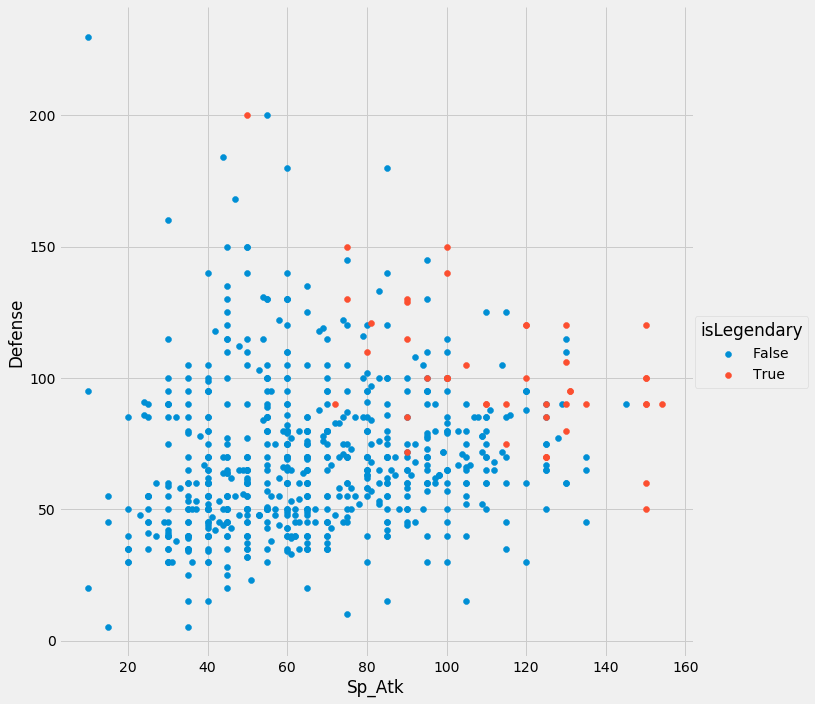

In [7]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,8))

sns.FacetGrid(df, hue="isLegendary", size = 10).map(plt.scatter, "Sp_Atk", "Defense").add_legend()

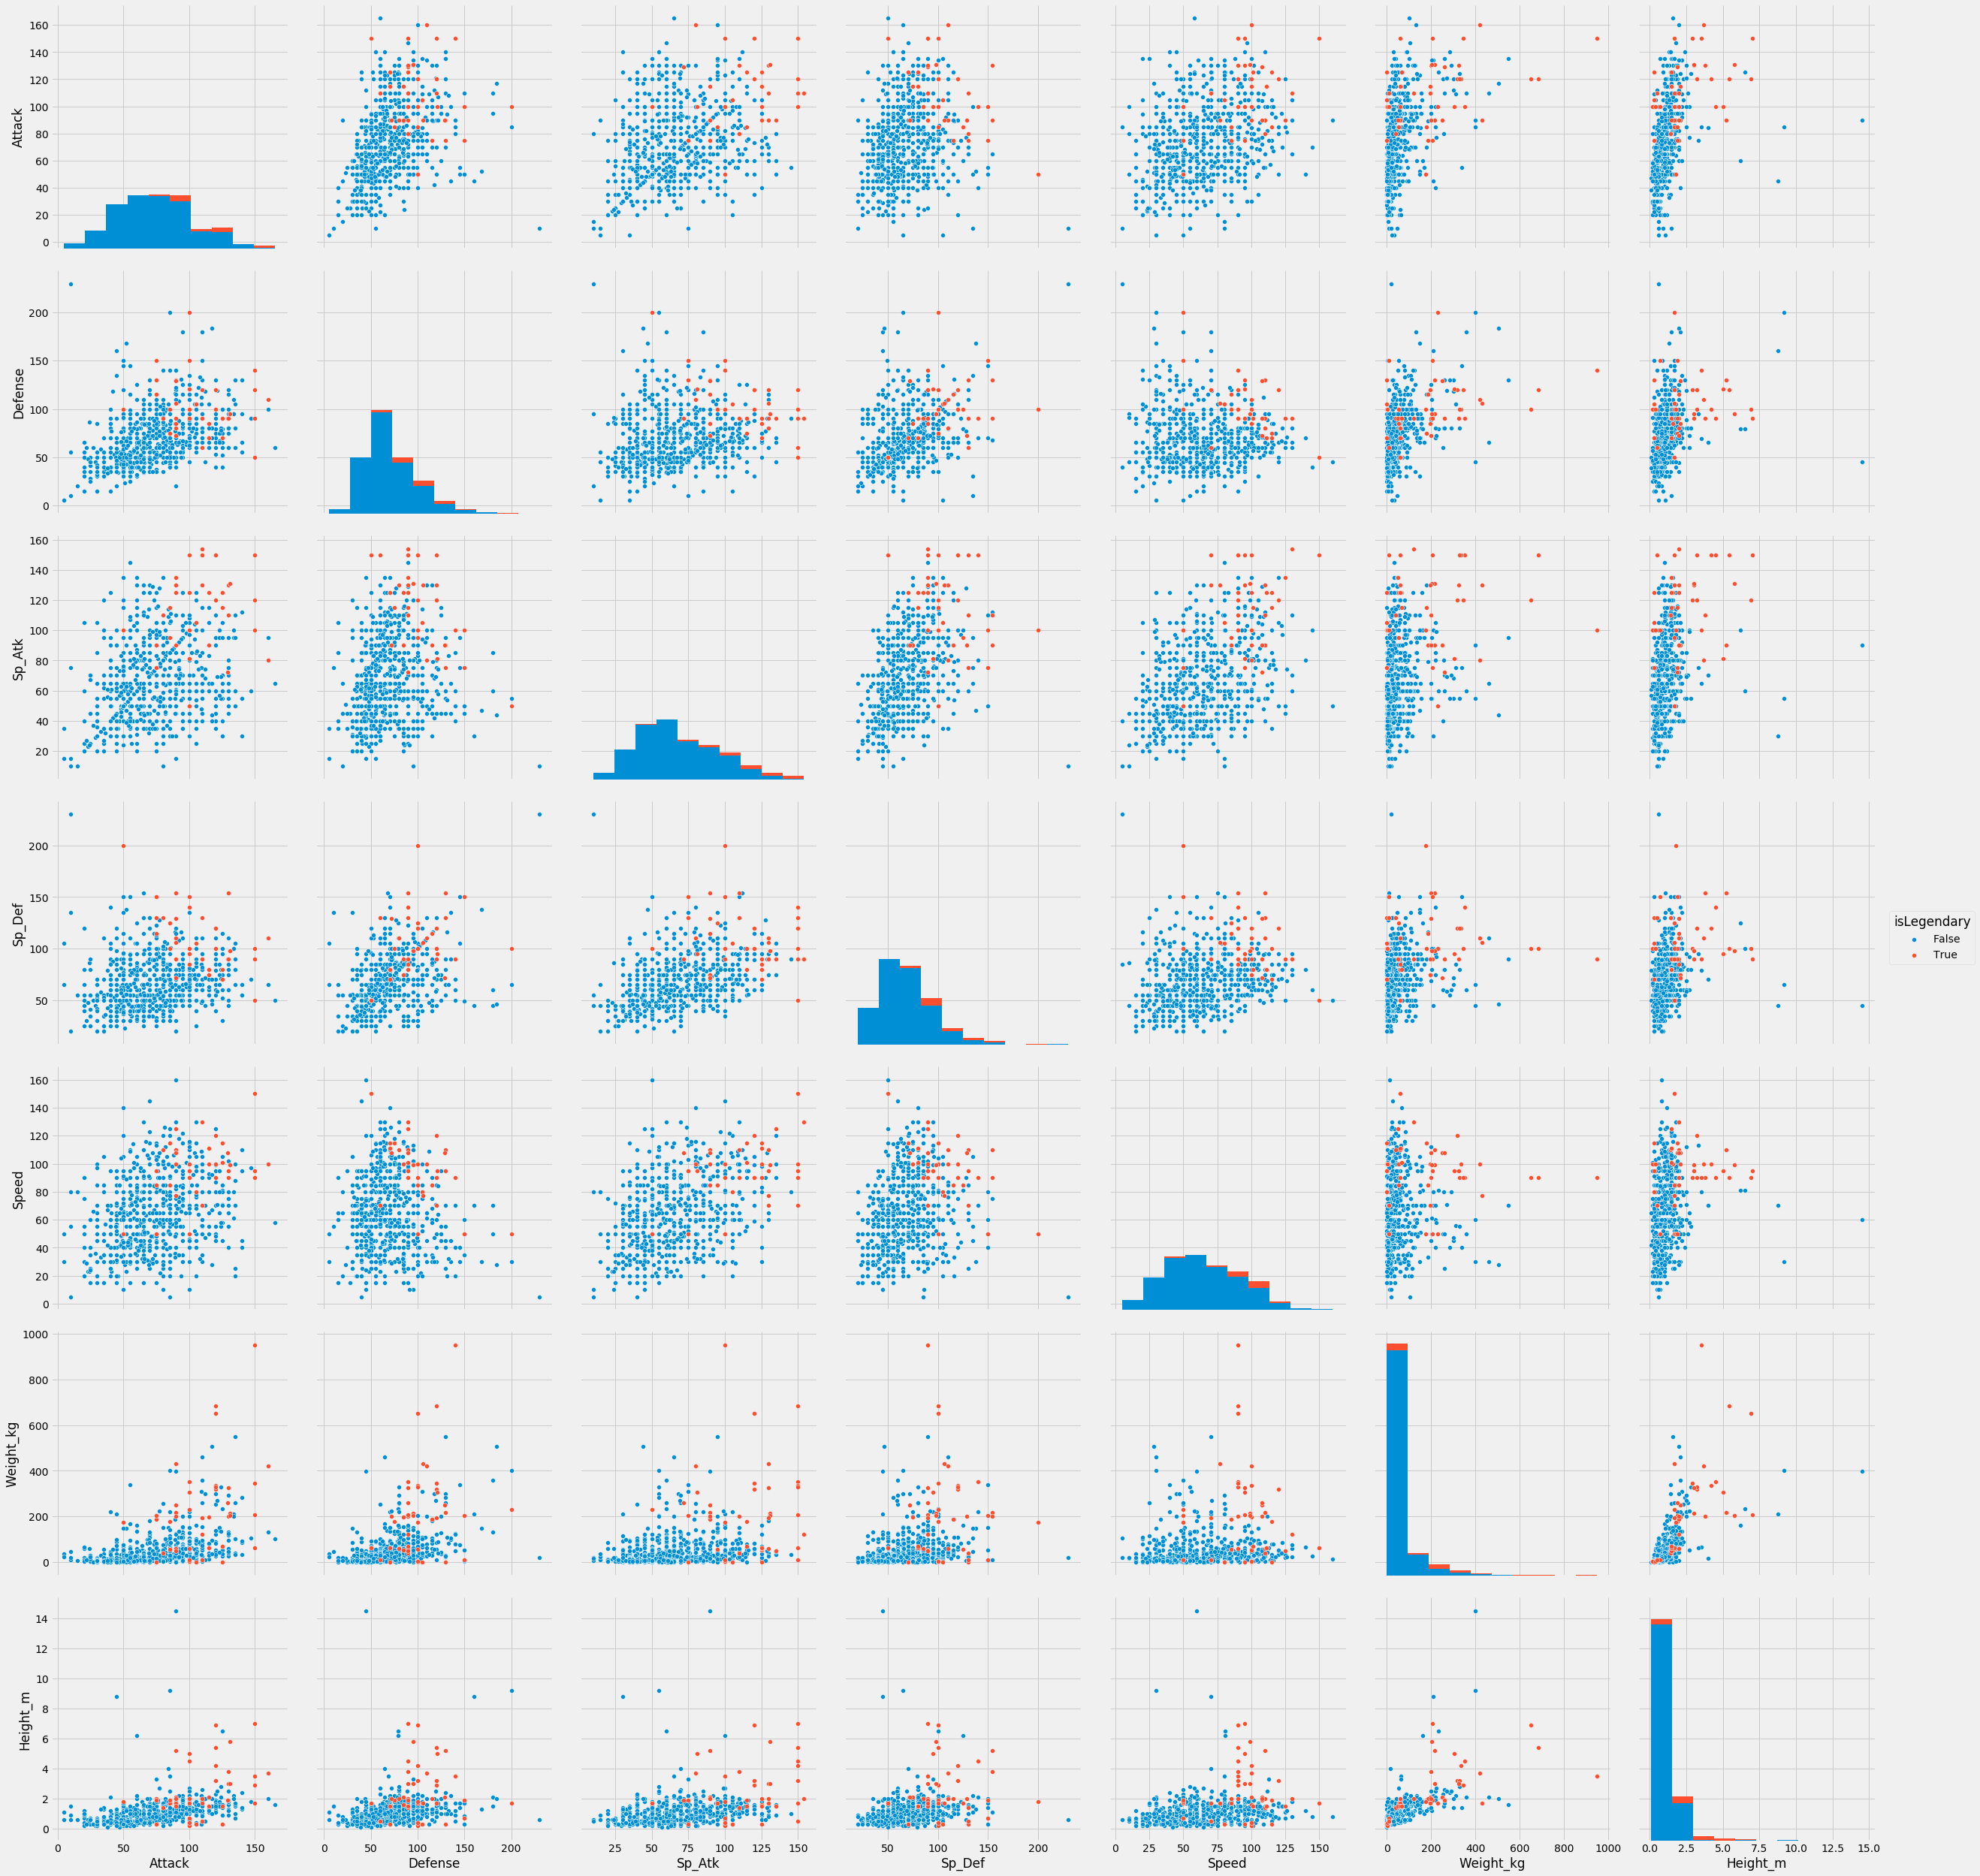

In [8]:
g = sns.pairplot(df, hue="isLegendary", x_vars=["Attack", "Defense", "Sp_Atk", "Sp_Def", "Speed", "Weight_kg", "Height_m"],
                 y_vars=["Attack", "Defense", "Sp_Atk", "Sp_Def", "Speed", "Weight_kg", "Height_m"], size=5)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X = df[["Attack", "Defense", "Sp_Atk", "Sp_Def", "Speed", "Weight_kg", "Height_m"]]
y = df["isLegendary"]

In [10]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)  

In [11]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train, y_train)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [12]:
y_pred = svclassifier.predict(X_test)  

In [13]:
metrics.accuracy_score(y_pred,y_test)

0.9586206896551724

In [14]:
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn import metrics
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred)) 

[[131   3]
 [  3   8]]
             precision    recall  f1-score   support

      False       0.98      0.98      0.98       134
       True       0.73      0.73      0.73        11

avg / total       0.96      0.96      0.96       145



In [15]:
list(zip(y_test, y_pred))

[(False, False),
 (False, False),
 (False, False),
 (False, False),
 (False, False),
 (False, False),
 (False, False),
 (False, False),
 (False, False),
 (False, False),
 (False, False),
 (False, False),
 (False, False),
 (False, False),
 (False, False),
 (False, False),
 (True, False),
 (False, False),
 (False, False),
 (False, False),
 (False, False),
 (True, True),
 (True, True),
 (False, False),
 (True, True),
 (False, False),
 (False, False),
 (False, False),
 (False, False),
 (False, False),
 (True, True),
 (False, False),
 (False, False),
 (False, False),
 (False, False),
 (False, False),
 (False, False),
 (True, True),
 (False, False),
 (False, False),
 (False, False),
 (False, False),
 (False, False),
 (False, False),
 (False, False),
 (False, False),
 (True, True),
 (False, False),
 (False, False),
 (False, False),
 (True, True),
 (False, False),
 (False, False),
 (False, False),
 (False, False),
 (False, False),
 (False, False),
 (False, False),
 (False, False),
 (False, Fal